In [3]:
!pip install catboost

In [4]:
!pip install xgboost


  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# Models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 

warnings.filterwarnings("ignore")


In [3]:
#data.. 
df = pd.read_csv('data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [7]:
print('Categories in gender variable: ', end=" ")
print(df['gender'].unique())
print('')

print('Categories in race/ethnicity variable:', end=" ")
print(df['race/ethnicity'].unique())
print('')

print('Categories in parental level of education variable:', end=" ")
print(df['parental level of education'].unique())
print('')

print('Categories in lunch variable:', end=" ")
print(df['lunch'].unique())
print('')

print('Categories in test preparaton course variable', end=" ")
print(df['test preparation course'].unique())

Categories in gender variable:  ['female' 'male']

Categories in race/ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable: ['standard' 'free/reduced']

Categories in test preparaton course variable ['none' 'completed']


In [8]:
## Create Column Transformer with 3 types of transformers:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose  import ColumnTransformer

numeric_transformation = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformation, num_features),
    ]
)



In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [11]:
#train test split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Creating an Evaluation function to give all metrics after model training:

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square 

In [13]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
}

#Lists to store results
model_list = []
r2_list = []


for name, model in models.items():
    #Train model
    model.fit(X_train, y_train)
    
    #Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evaluate train and test performance
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
   
    print(name)
    model_list.append(name)
    
    #Print training performance
    print('Model Performance for Training set')
    print("- Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))
    
    print("------------------------------------")
    
    #Print test performance
    print('Model Performance for Test set')
    print("- Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))  # Corrected variable
    print("- R2 score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


LinearRegression
Model Performance for Training set
- Root Mean Square Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 score: 0.8743
------------------------------------
Model Performance for Test set
- Root Mean Square Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 score: 0.8804


Lasso
Model Performance for Training set
- Root Mean Square Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 score: 0.8071
------------------------------------
Model Performance for Test set
- Root Mean Square Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 score: 0.8253


Ridge
Model Performance for Training set
- Root Mean Square Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 score: 0.8743
------------------------------------
Model Performance for Test set
- Root Mean Square Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 score: 0.8806


K-Neighbors Regressor
Model Performance for Training set
- Root Mean Square Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 score: 0.8555
-------------------------

#### Result:

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
8,AdaBoostRegressor,0.853277
5,RandomForestRegressor,0.851680
7,CatBoostRegressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,DecisionTreeRegressor,0.771244


I'll go for LinearRegression....

In [16]:
#LinearRegression:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the Model is %.2f' %score)

Accuracy of the Model is 88.04


Text(0, 0.5, 'Predicted')

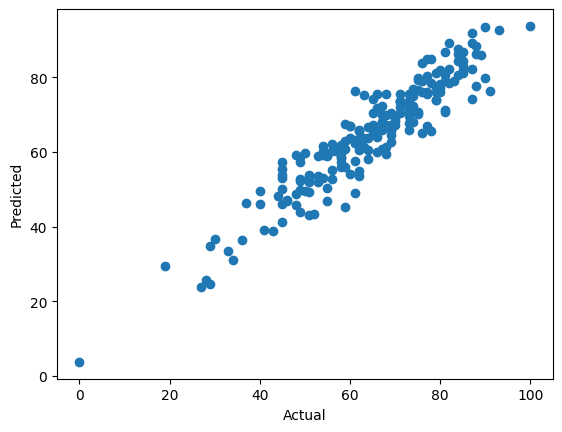

In [17]:
#Plot y_pred and y_test:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

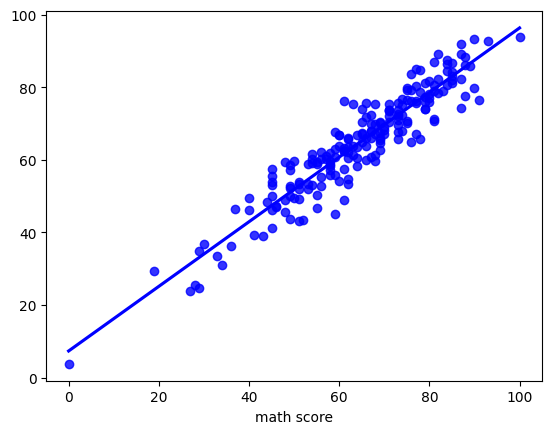

In [19]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='blue')

##### Difference between Actual and Predicted values:

In [21]:
pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred, 'Difference':y_test - y_pred })
pred_df

,Actual value,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
